In [1]:
from ast import arg

import matplotlib.cbook as cbook
import random
import itertools
import copy
import os

from analysis_utils import*
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict

from scipy.stats import mannwhitneyu

In [2]:
methods = ['degree', 'degree_random', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum', 'new_neiNodeSum_1', 
                 'tc2_sum_1', 'tc4_sum_1']
methods_rvs = methods[::-1]
msPath = '../../MeasureValuesRanking/NodesMeasures'
msDic = dict()
for net in range(1,21):
    msDic[net] = dict()
    for ms in methods:
        with open(f'{msPath}/h_{ms}_realNet_{net}.json', 'r') as f:
            msDic[net][ms] = json.load(f)

In [20]:
mu = 0.1
nets_paras = {
    1:{'net':1, 'lbd':[0.0002,  0.001,  0.007, ]},
    6:{'net':6, 'lbd':[7e-05,  0.0006,  0.005,]},
    8:{'net':8, 'lbd':[0.004,  0.005,  0.02, ]},
    9:{'net':9, 'lbd':[0.0009,  0.002,  0.006,]},
    10:{'net':10, 'lbd':[0.0003,  0.0007,  0.01,]},
    11:{'net':11, 'lbd':[0.0002,  0.0003,  0.005, ]},
    12:{'net':12, 'lbd':[0.004,  0.003,  0.01,]},
    13:{'net':13, 'lbd':[0.002,  0.004,  0.02,]},
    14:{'net':14, 'lbd':[0.0004,  0.001,  0.02, ]},
    15:{'net':15, 'lbd':[0.002,  0.003,  0.01,]},
    16:{'net':16, 'lbd':[0.003,  0.003,  0.02,]},
}

In [3]:
mu = 1
nets_paras = {
    1:{'net':1, 'lbd':[0.0009,  0.009,  0.09, ]},
    6:{'net':6, 'lbd':[0.0009,  0.005,  0.05,]},
    8:{'net':8, 'lbd':[0.03,  0.05,  0.1,]},
    9:{'net':9, 'lbd':[0.009,  0.02,  0.09,]},
    10:{'net':10, 'lbd':[0.002,  0.006,  0.2,]},
    11:{'net':11, 'lbd':[0.002,  0.003,  0.05,]},
    12:{'net':12, 'lbd':[0.02,  0.03,  0.1,]},
    13:{'net':13, 'lbd':[0.02,  0.02,  0.2,]},
    14:{'net':14, 'lbd':[0.003,  0.006,  0.2,]},
    15:{'net':15, 'lbd':[0.02,  0.02,  0.07,]},
    16:{'net':16, 'lbd':[0.02,  0.02,  0.2, ]},
}

In [21]:
Mu = int(mu*10)
with open(f'tc_SIR_multi_robust_range_mu{Mu}.json', 'r') as f:
    result = json.load(f)

resultDic = defaultdict(dict)
for item in result:
    itemsp = item.split('_')
    net = itemsp[0][1:]
    theta = itemsp[1][5:]
    lbd = itemsp[2][3:]
    node = itemsp[4][3:]
    resultDic[f'n{net}_theta{theta}_lbd{lbd}'][node] = result[item]

In [22]:
methods = ['degree', 'degree_random', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum', 'new_neiNodeSum_1',  
                'tc2_sum_1', 'tc4_sum_1',]

maxEsize = {
    1:25, 2:81, 3:107, 4:230, 5:83, 6:99, 7:31, 8:37, 9:25, 10:16,
    11:13, 12:10, 13:7, 14:10, 15:10, 16:7, 17:124, 18:104, 19:58, 20:157
}
tauDic = dict()
for net in [1,6,8,9,10,11,12,13,14,15,16]: 
    tauDic[net] = dict()
    for id,theta in enumerate([1/maxEsize[net], 1/4, 1/2]):
        tauDic[net][theta] = dict()
        lThres = nets_paras[net]['lbd'][id]
        if lThres*10 >= 1:
            l_up = lThres*2 
        else:
            l_up = lThres*10
        for lbd in [lThres*0.1, lThres, l_up]:
            # print(theta)
            tauDic[net][theta][lbd] = dict()
            for ms in methods:
                with open(f'../../MeasureValuesRanking/NodesMeasures/h_{ms}_realNet_{net}.json', "r") as h:
                    msDic = json.load(h)
                tauDic[net][theta][lbd][ms] = round(caltau(resultDic[f'n{net}_theta{theta}_lbd{lbd}'], msDic, 'b'), 5)

In [6]:
labelsshow = {'new_neiNodeSum_1':'MIS$_{t=1}^{HC}$', 
          'degree':'Hyper-degree',
          'clsBetweenness':'2-Betweenness', 
          'clsCloseness':'2-Closeness', 
          'clsKcore':'2-K-coreness', 
          'clsEigenvector':'2-Eigenvector', 
          'KMcore_g1':'Hyper-coreness-R', 
          'KMcore_gf':'Hyper-coreness-$R_w$', 
          'neiNodesNum':'2-Degree', 
          'nodeEdgeEigenvector_linear':'Eigenvector_linear', 
          'nodeEdgeEigenvector_max':'Eigenvector_linear',
        }
colors = {
          # 'new_neiNodeSum_1':'red',
          'new_neiNodeSum_1': 'firebrick', # 'darkviolet', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          'tc2_sum_1': 'red',
          'tc4_sum_1': 'red',
          }

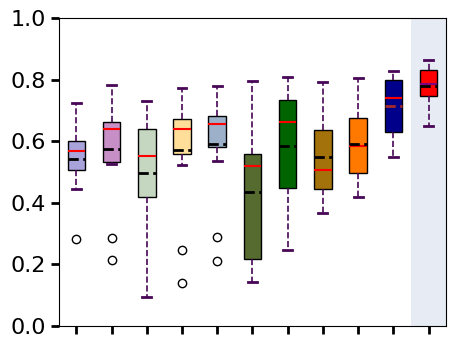

In [25]:
theta_id = 2  #0.25
ratio = 0.1
data_all = []
methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
                'degree', 
            'tc4_sum_1', 
            ]
for ms in methods_plt:
    data = []
    for net in [1,6,8,9,10,11,12,13,14,15,16]:
        thetaDic = {1:1/maxEsize[net], 2:1/4, 3:1/2}
        lThres = nets_paras[net]['lbd'][theta_id-1]
        l = lThres*ratio
        if ratio == 10:
            if lThres*10 >= 1:
                l = lThres*2
            else:
                l = lThres*10
        if not math.isnan(tauDic[net][thetaDic[theta_id]][l][ms]):
            data.append(tauDic[net][thetaDic[theta_id]][l][ms])
    data_all.append(data)   
plt.figure(figsize=(5,4))

plt.axvspan(10.5, 11.5, color=(208/255, 217/255, 233/255), alpha=0.5, lw=0)
f = plt.boxplot(data_all, 
            patch_artist=True,  
            medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 1.5}, 
            showmeans=True, 
            meanline=True,
            meanprops={        
            'markeredgecolor': 'r', 'color': 'black', 'linewidth': 2},
            whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'},
            capprops={'linestyle': '-', 'linewidth': 2, 'color': '#480656'}
            )
colorlst = [colors[_] for _ in methods_plt]
for patch, color in zip(f['boxes'], colorlst):
    patch.set_facecolor(color)

f['medians'][9].set_color('r')
f['medians'][9].set_linestyle('-')
f['means'][9].set_color('brown')

# IPS1
f['medians'][10].set_color('purple')
f['medians'][10].set_linestyle('-')
f['means'][10].set_color('black')


plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(axis='y', labelsize=16)  
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='x', which='major', size=6, width=2)
plt.tick_params(axis='y', which='major', size=6, width=2) 
plt.gca().set_xticklabels([])

muName = int(mu*10)
ratioName = int(ratio*10)
plt.savefig(f'savefig_all/samey_mu{muName}_theta{theta_id}_lr{ratioName}.svg', format='svg', bbox_inches='tight',dpi=300)
plt.show()

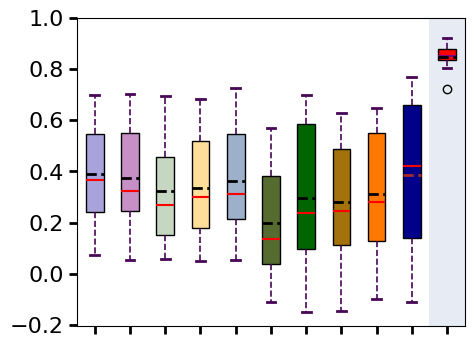

In [28]:
theta_id = 3  # 0.5
ratio = 10
data_all = []
methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
                # 'new_neiNodeSum_1',
                'degree', 
            'tc2_sum_1', 
                ]
            
for ms in methods_plt:
    data = []
    for net in [1,6,8,9,10,11,12,13,14,15,16]:
        thetaDic = {1:1/maxEsize[net], 2:1/4, 3:1/2}
        lThres = nets_paras[net]['lbd'][theta_id-1]
        l = lThres*ratio
        if ratio == 10:
            if lThres*10 >= 1:
                l = lThres*2
            else:
                l = lThres*10
        if not math.isnan(tauDic[net][thetaDic[theta_id]][l][ms]):
            data.append(tauDic[net][thetaDic[theta_id]][l][ms])
    data_all.append(data)   
plt.figure(figsize=(5,4))

plt.axvspan(10.5, 11.5, color=(208/255, 217/255, 233/255), alpha=0.5, lw=0)
f = plt.boxplot(data_all, 
            patch_artist=True,  
            medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 1.5}, 
            showmeans=True, 
            meanline=True,
            meanprops={        
            'markeredgecolor': 'r', 'color': 'black', 'linewidth': 2},
            whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'},
            capprops={'linestyle': '-', 'linewidth': 2, 'color': '#480656'}
            )
colorlst = [colors[_] for _ in methods_plt]
for patch, color in zip(f['boxes'], colorlst):
    patch.set_facecolor(color)


f['medians'][9].set_color('r')
f['medians'][9].set_linestyle('-')
f['means'][9].set_color('brown')

# IPS1
f['medians'][10].set_color('purple')
f['medians'][10].set_linestyle('-')
f['means'][10].set_color('black')


plt.yticks([-0.2,0.0,0.2,0.4,0.6,0.8,1.0])

plt.tick_params(axis='y', labelsize=16)  
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='x', which='major', size=6, width=2) 
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.gca().set_xticklabels([])

muName = int(mu*10)
ratioName = int(ratio*10)
plt.savefig(f'savefig_all/samey_mu{muName}_theta{theta_id}_lr{ratioName}.svg', format='svg', bbox_inches='tight',dpi=300)
plt.show()


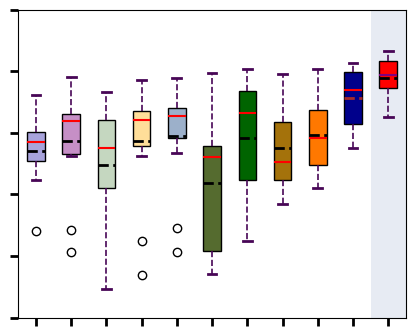

In [31]:
theta_id = 2  # 0.25
ratio = 0.1
data_all = []
methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
                'degree', 
            'tc4_sum_1',
            ]
for ms in methods_plt:
    data = []
    for net in [1,6,8,9,10,11,12,13,14,15,16]:
        thetaDic = {1:1/maxEsize[net], 2:1/4, 3:1/2}
        lThres = nets_paras[net]['lbd'][theta_id-1]
        l = lThres*ratio
        if ratio == 10:
            if lThres*10 >= 1:
                l = lThres*2
            else:
                l = lThres*10
        if not math.isnan(tauDic[net][thetaDic[theta_id]][l][ms]):
            data.append(tauDic[net][thetaDic[theta_id]][l][ms])
    data_all.append(data)   
plt.figure(figsize=(5,4))

plt.axvspan(10.5, 11.5, color=(208/255, 217/255, 233/255), alpha=0.5, lw=0)
f = plt.boxplot(data_all, 
            patch_artist=True,  
            medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 1.5},  
            showmeans=True, 
            meanline=True,
            meanprops={     
            'markeredgecolor': 'r', 'color': 'black', 'linewidth': 2},
            whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'}, 
            capprops={'linestyle': '-', 'linewidth': 2, 'color': '#480656'}
            )
colorlst = [colors[_] for _ in methods_plt]
for patch, color in zip(f['boxes'], colorlst):
    patch.set_facecolor(color)


f['medians'][9].set_color('r')
f['medians'][9].set_linestyle('-')
f['means'][9].set_color('brown')

#
f['medians'][10].set_color('purple')
f['medians'][10].set_linestyle('-')
f['means'][10].set_color('black')

plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(axis='y', labelsize=16) 
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='x', which='major', size=6, width=2) 
plt.tick_params(axis='y', which='major', size=6, width=2)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

muName = int(mu*10)
ratioName = int(ratio*10)
plt.savefig(f'savefig_all/main_mu{muName}_theta{theta_id}_lr{ratioName}.svg', format='svg', bbox_inches='tight',dpi=300)
plt.show()


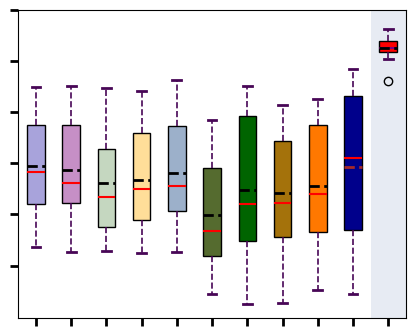

In [35]:
theta_id = 3  # 0.5
ratio = 10
data_all = []
methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 
                'degree', 
             'tc2_sum_1', 
            ]
for ms in methods_plt:
    data = []
    for net in [1,6,8,9,10,11,12,13,14,15,16]:
        thetaDic = {1:1/maxEsize[net], 2:1/4, 3:1/2}
        lThres = nets_paras[net]['lbd'][theta_id-1]
        l = lThres*ratio
        if ratio == 10:
            if lThres*10 >= 1:
                l = lThres*2
            else:
                l = lThres*10
        if not math.isnan(tauDic[net][thetaDic[theta_id]][l][ms]):
            data.append(tauDic[net][thetaDic[theta_id]][l][ms])
    data_all.append(data)   
plt.figure(figsize=(5,4))

plt.axvspan(10.5, 11.5, color=(208/255, 217/255, 233/255), alpha=0.5, lw=0)
f = plt.boxplot(data_all, 
            patch_artist=True,  
            medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 1.5},  
            showmeans=True, 
            meanline=True,
            meanprops={     
            'markeredgecolor': 'r', 'color': 'black', 'linewidth': 2},
            whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'}, 
            capprops={'linestyle': '-', 'linewidth': 2, 'color': '#480656'}
            )
colorlst = [colors[_] for _ in methods_plt]
for patch, color in zip(f['boxes'], colorlst):
    patch.set_facecolor(color)


f['medians'][9].set_color('r')
f['medians'][9].set_linestyle('-')
f['means'][9].set_color('brown')

#
f['medians'][10].set_color('purple')
f['medians'][10].set_linestyle('-')
f['means'][10].set_color('black')

plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(axis='y', labelsize=16) 
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='x', which='major', size=6, width=2) 
plt.tick_params(axis='y', which='major', size=6, width=2)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

muName = int(mu*10)
ratioName = int(ratio*10)
plt.savefig(f'savefig_all/main_mu{muName}_theta{theta_id}_lr{ratioName}.svg', format='svg', bbox_inches='tight',dpi=300)
plt.show()
